# Happy Face Detection

### Importing libraries and Loading data

In [105]:
import numpy as np
import pandas as pd 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import h5py
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPool2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential

import pydot
from IPython.display import SVG


import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow


In [106]:
# Function for data loading 
def load_dataset(path_to_train, path_to_test):
    train_dataset = h5py.File(path_to_train)
    train_x = np.array(train_dataset['train_set_x'][:])
    train_y = np.array(train_dataset['train_set_y'][:])

    test_dataset = h5py.File(path_to_test)
    test_x = np.array(test_dataset['test_set_x'][:])
    test_y = np.array(test_dataset['test_set_y'][:])

    # y reshaped
    train_y = train_y.reshape((1, train_x.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))

    return train_x, train_y, test_x, test_y

# Load Dataset

In [107]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig = load_dataset("train_happy.h5","test_happy.h5")

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


Image shape : (64, 64, 3)


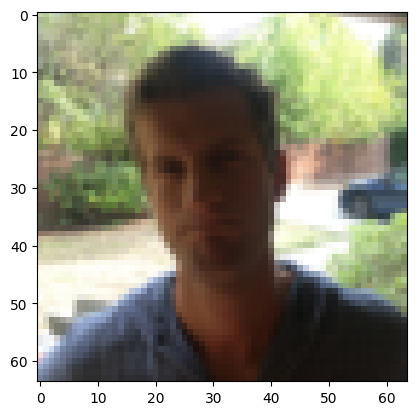

In [108]:
# Sample image from dataset
print("Image shape :",X_train_orig[10].shape)
imshow(X_train_orig[10])

# Building Model with optimizer=adam

In [122]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='Same', input_shape=(64,64,3)))
model1.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='Same'))

model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='Same'))

model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))

In [123]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_35 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 32768)           

In [125]:
epochs = 10
batch_size = 30

In [126]:
history1 = model1.fit(x=X_train, y=Y_train, epochs=epochs, verbose=2,batch_size=batch_size)

Epoch 1/10
20/20 - 77s - loss: 0.8173 - accuracy: 0.4983 - 77s/epoch - 4s/step
Epoch 2/10
20/20 - 73s - loss: 0.6613 - accuracy: 0.6300 - 73s/epoch - 4s/step
Epoch 3/10
20/20 - 89s - loss: 0.5265 - accuracy: 0.7217 - 89s/epoch - 4s/step
Epoch 4/10
20/20 - 82s - loss: 0.3376 - accuracy: 0.8700 - 82s/epoch - 4s/step
Epoch 5/10
20/20 - 81s - loss: 0.2209 - accuracy: 0.9250 - 81s/epoch - 4s/step
Epoch 6/10
20/20 - 67s - loss: 0.1682 - accuracy: 0.9233 - 67s/epoch - 3s/step
Epoch 7/10
20/20 - 80s - loss: 0.1356 - accuracy: 0.9500 - 80s/epoch - 4s/step
Epoch 8/10
20/20 - 75s - loss: 0.1226 - accuracy: 0.9500 - 75s/epoch - 4s/step
Epoch 9/10
20/20 - 73s - loss: 0.1101 - accuracy: 0.9600 - 73s/epoch - 4s/step
Epoch 10/10
20/20 - 81s - loss: 0.1236 - accuracy: 0.9583 - 81s/epoch - 4s/step


### Evaluation

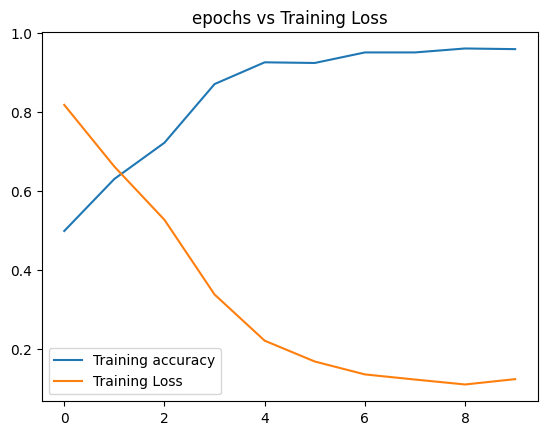

In [127]:
train_accuracy = history1.history['accuracy']
train_loss = history1.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [128]:
# Model Evaluation on test set
test_loss, test_accuracy = model1.evaluate(X_test, Y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

3/3 [==============================] - 6s 1s/step - loss: 0.1275 - accuracy: 0.9467
Test loss: 0.1275 accuracy: 0.9467


### Confusion Matrix

5/5 [==============================] - 6s 1s/step
[1.   0.93 1.   1.   0.17 0.97 0.98 0.01 1.   0.01 0.88 0.03 0.64 0.56
 0.02 0.96 0.   0.97 0.   1.   0.99 0.92 0.29 1.   0.   0.   0.7  0.01
 0.46 1.   1.   1.   0.98 1.   1.   1.   0.03 0.1  0.02 0.   0.93 0.01
 0.13 0.01 1.   0.01 0.   0.   1.   0.01 0.   0.08 0.96 0.9  0.02 1.
 0.94 0.95 1.   1.   0.88 0.99 0.86 0.94 1.   0.26 0.89 0.9  1.   1.
 1.   0.05 0.04 0.26 0.04 0.73 0.95 0.01 0.02 0.99 0.05 1.   0.08 1.
 0.06 0.72 1.   0.   0.02 1.   0.03 0.02 0.04 0.01 0.98 0.15 0.99 0.03
 1.   0.95 1.   0.31 1.   0.01 0.01 0.01 0.01 1.   0.01 0.01 1.   1.
 0.01 0.19 1.   0.97 0.15 0.04 1.   0.03 0.98 1.   0.02 1.   0.84 0.99
 0.   0.98 0.99 0.01 1.   1.   0.01 1.   0.99 1.   0.46 0.9  0.21 1.
 0.94 1.   0.27 0.89 0.03 0.33 0.01 0.95 1.   0.53]
[1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0
 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0

<AxesSubplot:>

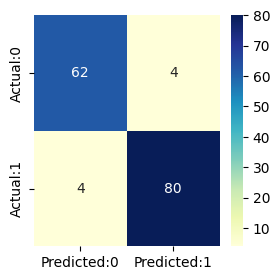

In [129]:
pred=model1.predict(X_test)
pred = pred.flatten()
print(pred.round(2))
pred = np.where(pred > 0.5, 1, 0)
print(pred)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,3))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Predictions 

5/5 [==============================] - 6s 1s/step
The expected labels is :1
The predicted labels is :1


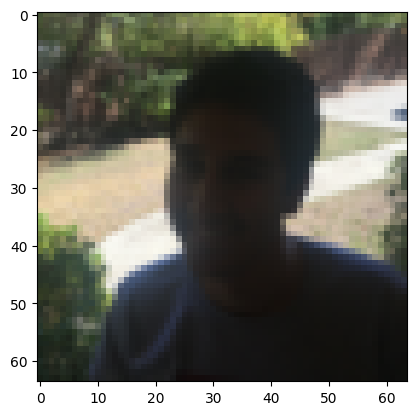

In [130]:
# Generate predictions for an image and compare it with expected labels:
pr=model1.predict(X_test)[20][0]
if pr>0.5:
    pr=1
else:
    pr=0
print("The expected labels is :"+str(Y_test[20][0]))
print("The predicted labels is :"+str(pr))
imshow(X_test_orig[20])

# Building Model with optimizer=rmsprop

In [131]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='Same', input_shape=(64,64,3)))
model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='Same'))

model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='Same'))

model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

In [132]:
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [133]:
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_38 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 32768)           

In [134]:
epochs = 10
batch_size = 30
history2 = model2.fit(x=X_train, y=Y_train, epochs=epochs, verbose=2,batch_size=batch_size)

Epoch 1/10
20/20 - 83s - loss: 0.7816 - accuracy: 0.5350 - 83s/epoch - 4s/step
Epoch 2/10
20/20 - 116s - loss: 0.6712 - accuracy: 0.6117 - 116s/epoch - 6s/step
Epoch 3/10
20/20 - 69s - loss: 0.6063 - accuracy: 0.6617 - 69s/epoch - 3s/step
Epoch 4/10
20/20 - 68s - loss: 0.4790 - accuracy: 0.7767 - 68s/epoch - 3s/step
Epoch 5/10
20/20 - 67s - loss: 0.3955 - accuracy: 0.8467 - 67s/epoch - 3s/step
Epoch 6/10
20/20 - 63s - loss: 0.2891 - accuracy: 0.8850 - 63s/epoch - 3s/step
Epoch 7/10
20/20 - 63s - loss: 0.2009 - accuracy: 0.9350 - 63s/epoch - 3s/step
Epoch 8/10
20/20 - 63s - loss: 0.2414 - accuracy: 0.9000 - 63s/epoch - 3s/step
Epoch 9/10
20/20 - 69s - loss: 0.1718 - accuracy: 0.9367 - 69s/epoch - 3s/step
Epoch 10/10
20/20 - 80s - loss: 0.1058 - accuracy: 0.9617 - 80s/epoch - 4s/step


### Evaluation

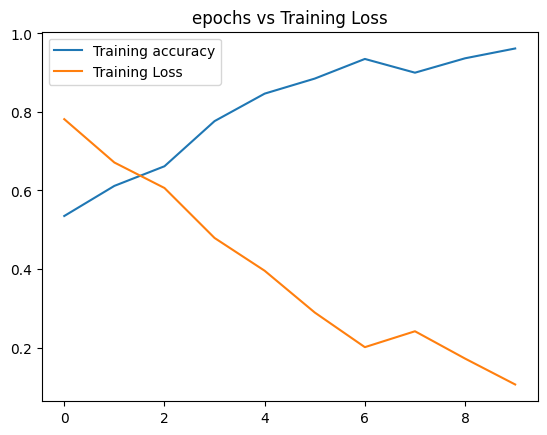

In [135]:
train_accuracy = history2.history['accuracy']
train_loss = history2.history['loss']

count = range(len(train_accuracy))
plt.plot(count, train_accuracy, label='Training accuracy')
plt.plot(count, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

In [136]:
# Model Evaluation on test set
test_loss, test_accuracy = model2.evaluate(X_test, Y_test, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

3/3 [==============================] - 3s 1s/step - loss: 0.1200 - accuracy: 0.9467
Test loss: 0.1200 accuracy: 0.9467


### Confusion Matrix

5/5 [==============================] - 5s 840ms/step
[1.   0.78 1.   1.   0.41 0.97 0.97 0.02 1.   0.   0.86 0.03 0.94 0.27
 0.04 0.95 0.   0.93 0.   1.   0.94 0.96 0.23 1.   0.   0.   0.85 0.
 0.23 1.   0.99 1.   0.97 1.   0.99 1.   0.01 0.01 0.01 0.   0.87 0.01
 0.04 0.   1.   0.   0.   0.   1.   0.01 0.   0.18 0.92 0.95 0.   1.
 0.96 0.9  1.   1.   0.81 0.99 0.73 0.89 1.   0.44 0.92 0.75 0.99 1.
 1.   0.03 0.01 0.14 0.01 0.78 0.9  0.   0.01 1.   0.06 1.   0.02 1.
 0.03 0.42 1.   0.   0.01 1.   0.01 0.01 0.01 0.   0.99 0.47 0.98 0.03
 1.   0.93 1.   0.03 1.   0.02 0.01 0.   0.01 0.99 0.01 0.   1.   1.
 0.   0.06 1.   0.94 0.16 0.04 1.   0.07 0.98 1.   0.   1.   0.88 0.98
 0.   0.99 0.88 0.   1.   1.   0.01 1.   0.97 1.   0.82 0.94 0.09 1.
 0.89 0.99 0.02 0.9  0.   0.12 0.   0.94 1.   0.12]
[1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0
 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 

<AxesSubplot:>

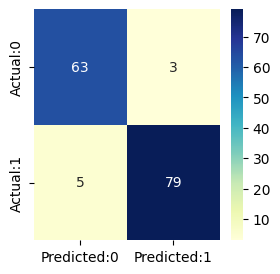

In [137]:
pred=model2.predict(X_test)
pred = pred.flatten()
print(pred.round(2))
pred = np.where(pred > 0.5, 1, 0)
print(pred)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (3,3))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### Predictions

5/5 [==============================] - 4s 830ms/step
The expected labels is :1
The predicted labels is :1


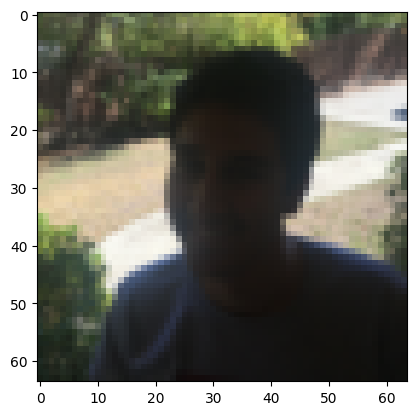

In [138]:
# Generate predictions for an image and compare it with expected labels:
pr=model2.predict(X_test)[20][0]
if pr>0.5:
    pr=1
else:
    pr=0
print("The expected labels is :"+str(Y_test[20][0]))
print("The predicted labels is :"+str(pr))
imshow(X_test_orig[20])